# Data analysis
Initial data analysis of the radiation and noise raw time series measurements.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import copy

## Read raw time series data
Read all CSVs and create two dataframes: real measurements and noise measurents
- Index: Time (relative)
- Column: Measurent (Voltage)

#### Real measurement data
Real mesurents are time series generated by the radiation source in the diode.

In [2]:
%%capture

# Create list with all CSV paths
paths_noise_csv = []
root_path = '../'

for folderName, subfolders, filenames in os.walk(root_path + 'data/raw/eventos'):
    for filename in filenames:
        paths_noise_csv.append(folderName + '/' + filename)

# Load data into dataframe
df_real = pd.DataFrame()
i = 0

for path in paths_noise_csv:
    df = pd.read_csv(path, skiprows=3, names=['time', 'voltage'])
    df.set_index('time', inplace=True)

    # Set index as time for the first CSV
    if i == 0:
        df_real.index = df.index

    # Store voltage reading as new column
    measurement_number = 'measurement_' + str(i)
    df_real[measurement_number] = df['voltage']

    i += 1


#### Noise measurement data
Noise measurements are the time series generated by the electrical noise in the diode.

In [3]:
%%capture

# Create list with all CSV paths
paths_noise_csv = []

for folderName, subfolders, filenames in os.walk(root_path + 'data/raw/ruido'):
    for filename in filenames:
        paths_noise_csv.append(folderName + '/' + filename)

# Load data into dataframe
df_noise = pd.DataFrame()
i = 0

for path in paths_noise_csv:
    df = pd.read_csv(path, skiprows=3, names=['time', 'voltage'])
    df.set_index('time', inplace=True)

    # Set index as time for the first CSV
    if i == 0:
        df_noise.index = df.index

    # Store voltage reading as new column
    measurement_number = 'measurement_' + str(i)
    df_noise[measurement_number] = df['voltage']

    i += 1


## Plot a real measurement
The real measurement corresponds to a time series generated by the radiation.

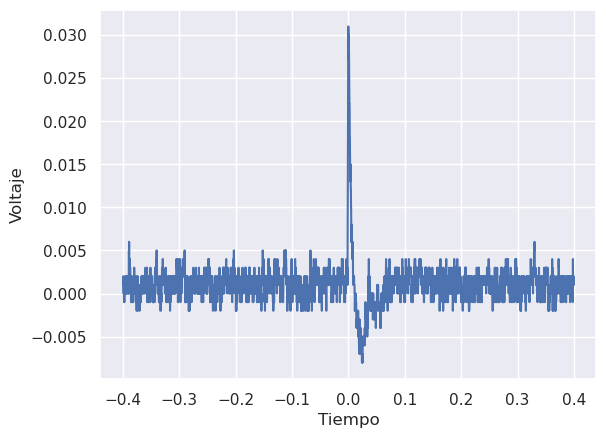

<Figure size 1500x500 with 0 Axes>

In [4]:
ax = sns.lineplot(data=df_real, x='time', y='measurement_0')

# Format
plt.figure(figsize=(15,5))
ax.set_xlabel('Tiempo')
ax.set_ylabel('Voltaje')

# Save as image
# plt.savefig('../reports/figures/real_measurement.png', dpi=150)

# Plot
plt.show()

## Plot the noise measurement
The noise measurement corresponds to a time series generated by the electrical noise.

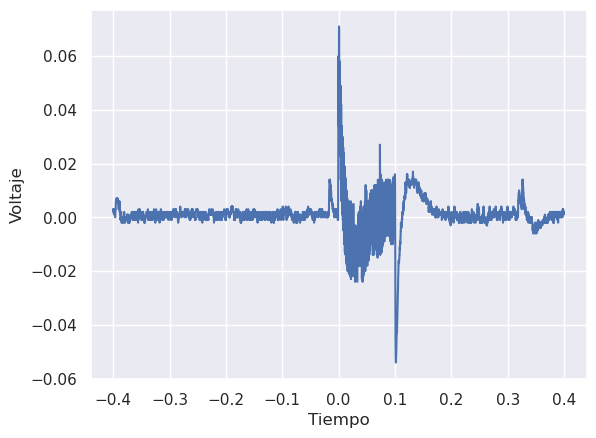

<Figure size 1500x500 with 0 Axes>

In [5]:
ax = sns.lineplot(data=df_noise, x='time', y='measurement_0')

# Format
plt.figure(figsize=(15,5))
ax.set_xlabel('Tiempo')
ax.set_ylabel('Voltaje')

# Save as image
# plt.savefig('../reports/figures/noise_measurement.png', dpi=150)

# Plot
plt.show()

## Number of measurements
Total number of time series for each class.

In [6]:
print('Number of real measurements:', df_real.shape[1])
print('Number of noise measurements:', df_noise.shape[1])

Number of real measurements: 402
Number of noise measurements: 409


## Real and noise time series comparison
Compare one real and noise time series.

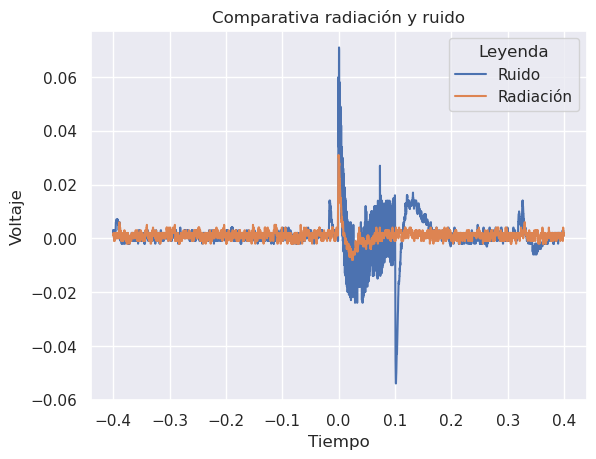

<Figure size 1500x500 with 0 Axes>

In [7]:
# Create dataframe with real and noise data for comparison
time_list = df_real.index.to_list()
real_list = df_real['measurement_0'].to_list()
real_legend_list = ['Radiación' for i in real_list]

noise_list = df_noise['measurement_0'].to_list()
noise_legend_list = ['Ruido' for i in noise_list]

df_comparison = pd.DataFrame()
df_comparison['time'] = time_list + time_list
df_comparison['measurement'] = noise_list + real_list
df_comparison['Leyenda'] = noise_legend_list + real_legend_list

# Plot the comparison
ax = sns.lineplot(data=df_comparison, x='time', y='measurement', hue='Leyenda')

# Format
plt.figure(figsize=(15,5))
ax.set_xlabel('Tiempo')
ax.set_ylabel('Voltaje')
ax.set_title('Comparativa radiación y ruido')

# Save as image
# plt.savefig('../reports/figures/measurement_comparison.png', dpi=150)

# Plot
plt.show()

## Plot real and noise data comparison

In [9]:
# Function to create plot comparison
def plot_comparison(df1, df2, number_plots=5, title1='Real', title2='Noise'):
    fig, axes = plt.subplots(number_plots, 2, figsize=(15,2.5 * number_plots))

    # Set column titles
    axes[0,0].set_title(title1, fontsize=30)
    axes[0,1].set_title(title2, fontsize=30)

    # Plot left data
    i = 0
    for col in df1:
        sns.lineplot(data=df1, x='time', y=col, ax=axes[i,0])
        i += 1
        if i == number_plots:
            break

    # Plot right data
    i = 0
    for col in df2:
        sns.lineplot(data=df2, x='time', y=col, ax=axes[i,1])
        i += 1
        if i == number_plots:
            break

In [10]:
# Function to plot first N measurements from dataframe
def plot_number(df, number_plots=5, title='Title'):
    fig, axes = plt.subplots(number_plots, 1, figsize=(10,2.5 * number_plots))

    # Set column titles
    axes[0].set_title(title, fontsize=30)

    # Plot left data
    i = 0
    for col in df:
        sns.lineplot(data=df, x='time', y=col, ax=axes[i])
        i += 1
        if i == number_plots:
            break

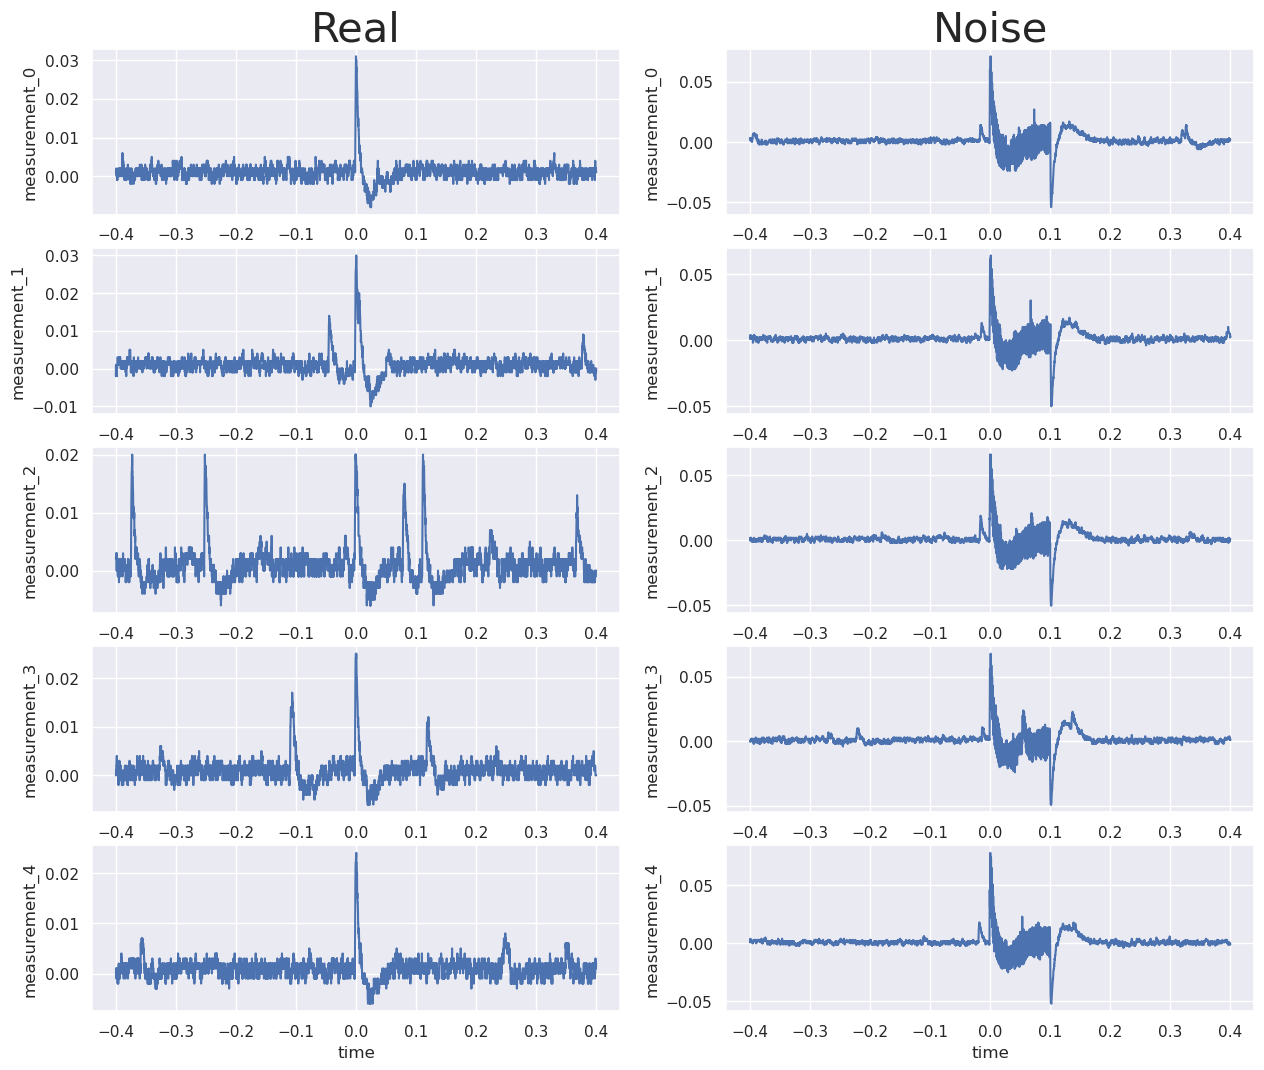

In [11]:
# Plot comparison
plot_comparison(df_real, df_noise, 5)